In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_data_from_folder(folder_path):
    data_frames = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            model_name = file_name.replace('.csv', '').replace('_', ' ')
            file_path = os.path.join(folder_path, file_name)
            data_frames[model_name] = pd.read_csv(file_path)
    return data_frames

In [ ]:
def extract_map_scores(data_frames):
    object_sizes = ["small", "medium", "large"]
    size_map_scores = {size: [] for size in object_sizes}
    model_names = list(data_frames.keys())

    for model_name, df in data_frames.items():
        for size in object_sizes:
            score = df[(df['iou'] == '0.50:0.95') & (df['area'] == size)]['score'].values
            if score.size > 0:
                size_map_scores[size].append(score[0] * 100)  # Convert to percentage
            else:
                size_map_scores[size].append(0)  # Assign 0 if no value found

    return model_names, size_map_scores

In [ ]:
def plot_map_per_object_size(model_names, size_map_scores):
    x = range(len(model_names))
    bar_width = 0.25

    plt.figure(figsize=(16, 8))  # Adjusted for a similar width-to-height ratio
    for i, (size, scores) in enumerate(size_map_scores.items()):
        plt.bar([pos + i * bar_width for pos in x], scores, bar_width, label=size.capitalize())

    # Add annotations on top of each bar for precise value display
    for i, (size, scores) in enumerate(size_map_scores.items()):
        for j, score in enumerate(scores):
            plt.text(j + i * bar_width, score + 1, f"{int(score)}", ha="center", va="bottom", fontsize=13)

    # Formatting the plot
    #plt.xlabel("Models")
    plt.ylabel("mAP (%)")
    #plt.title("mAP per Object Size")
    plt.xticks([pos + bar_width for pos in x], model_names, rotation=45, ha="right", fontsize=16)
    plt.legend(title="Object Size")

    # Add grid lines
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Only horizontal grid lines for a cleaner look

    plt.tight_layout()
    plt.show()

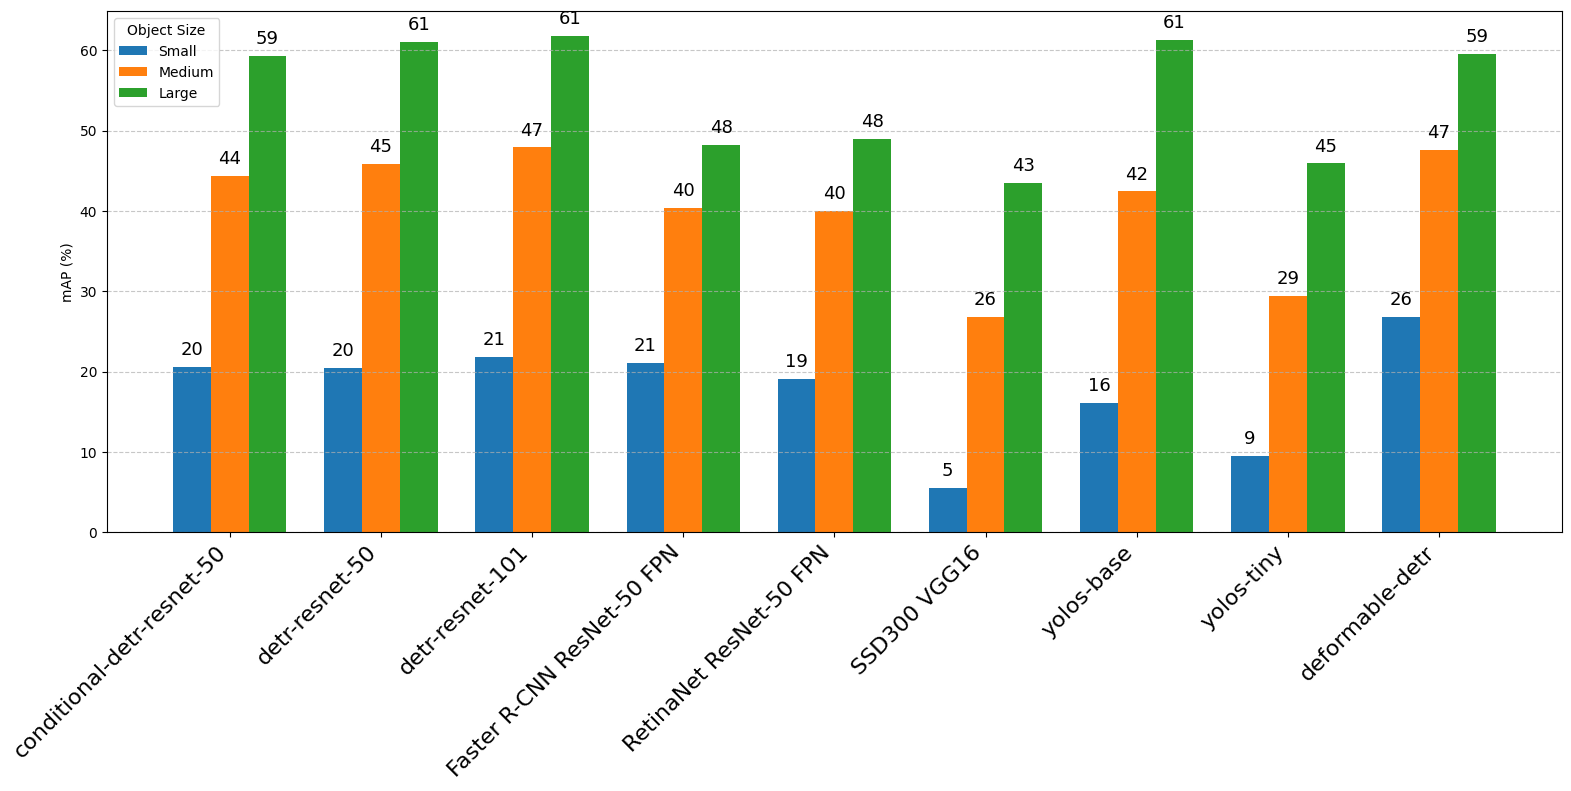

In [ ]:
def main(folder_path):
    data_frames = load_data_from_folder(folder_path)
    model_names, size_map_scores = extract_map_scores(data_frames)
    plot_map_per_object_size(model_names, size_map_scores)


folder_path = '/content/drive/MyDrive/COCO_dataset/Results'
main(folder_path)

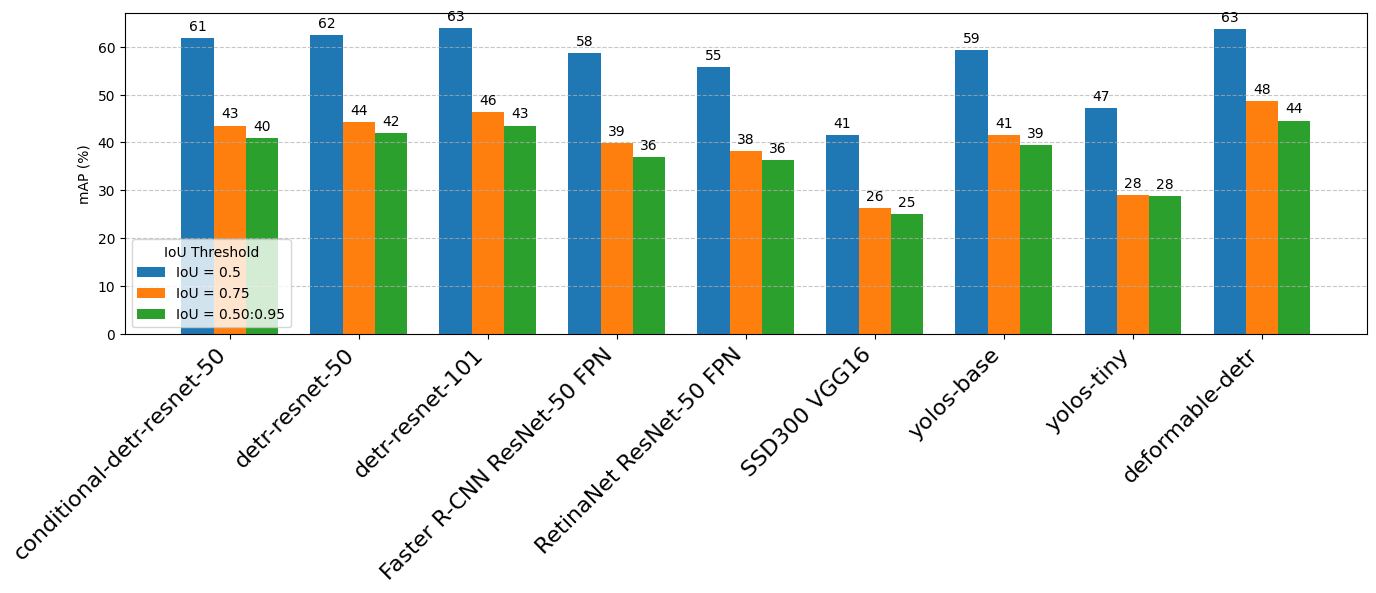

In [5]:
def load_data_from_folder(folder_path):
    data_frames = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            model_name = file_name.replace('.csv', '').replace('_', ' ')
            file_path = os.path.join(folder_path, file_name)
            data_frames[model_name] = pd.read_csv(file_path)
    return data_frames

def extract_map_scores(data_frames):
    iou_thresholds = ["0.5", "0.75", "0.50:0.95"]
    map_scores = {iou: [] for iou in iou_thresholds}
    model_names = list(data_frames.keys())

    for model_name, df in data_frames.items():
        for iou in iou_thresholds:
            score = df[(df['iou'] == iou) & (df['area'] == 'all')]['score'].values
            if score.size > 0:
                map_scores[iou].append(score[0] * 100)  # Convert to percentage
            else:
                map_scores[iou].append(0)  # Assign 0 if no value found

    return model_names, map_scores

def plot_map_per_iou(model_names, map_scores):
    x = range(len(model_names))
    bar_width = 0.25

    plt.figure(figsize=(14, 6))
    for i, (iou, scores) in enumerate(map_scores.items()):
        plt.bar([pos + i * bar_width for pos in x], scores, bar_width, label=f"IoU = {iou}")

    for i, (iou, scores) in enumerate(map_scores.items()):
        for j, score in enumerate(scores):
            plt.text(j + i * bar_width, score + 1, f"{int(score)}", ha="center", va="bottom", fontsize=10)

    #plt.xlabel("Models")
    plt.ylabel("mAP (%)")
    #plt.title("mAP per Model for Different IoU Thresholds")
    plt.xticks([pos + bar_width for pos in x], model_names, rotation=45, ha="right", fontsize=16)
    plt.legend(title="IoU Threshold", loc="lower left")  # <----- This line is changed

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def main(folder_path):
    data_frames = load_data_from_folder(folder_path)
    model_names, map_scores = extract_map_scores(data_frames)
    plot_map_per_iou(model_names, map_scores)

# Replace 'your_folder_path' with the path to your folder containing the CSV files
folder_path = '/content/drive/MyDrive/COCO_dataset/Results'
main(folder_path)

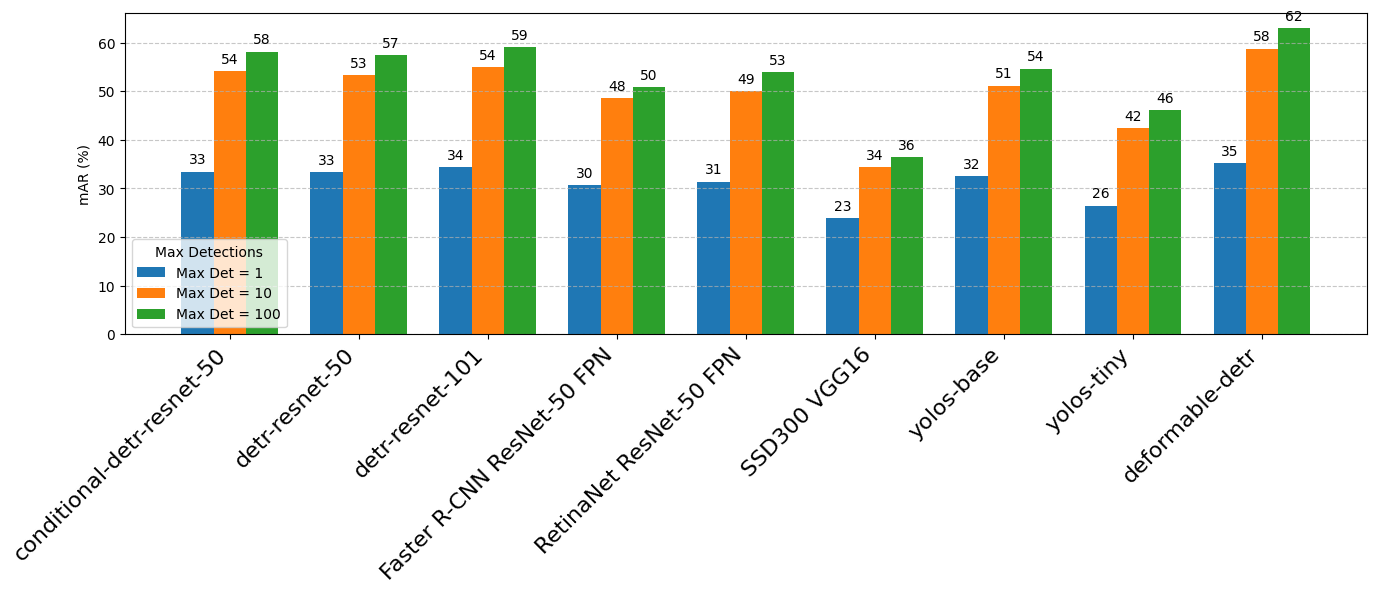

In [ ]:
def load_data_from_folder(folder_path):
    data_frames = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            model_name = file_name.replace('.csv', '').replace('_', ' ')
            file_path = os.path.join(folder_path, file_name)
            data_frames[model_name] = pd.read_csv(file_path)
    return data_frames

def extract_mar_scores(data_frames):
    max_dets_values = [1, 10, 100]
    mar_scores = {max_det: [] for max_det in max_dets_values}
    model_names = list(data_frames.keys())

    for model_name, df in data_frames.items():
        for max_det in max_dets_values:
            score = df[(df['metric'] == 'avg_recall') & (df['max_dets'] == max_det) & (df['area'] == 'all')]['score'].values
            if score.size > 0:
                mar_scores[max_det].append(score[0] * 100)  # Convert to percentage
            else:
                mar_scores[max_det].append(0)  # Assign 0 if no value found

    return model_names, mar_scores

def plot_mar_per_model(model_names, mar_scores):
    x = range(len(model_names))
    bar_width = 0.25

    plt.figure(figsize=(14, 6))
    for i, (max_det, scores) in enumerate(mar_scores.items()):
        plt.bar([pos + i * bar_width for pos in x], scores, bar_width, label=f"Max Det = {max_det}")

    # Add annotations on top of each bar
    for i, (max_det, scores) in enumerate(mar_scores.items()):
        for j, score in enumerate(scores):
            plt.text(j + i * bar_width, score + 1, f"{int(score)}", ha="center", va="bottom", fontsize=10)

    # Formatting the plot
    #plt.xlabel("Models")
    plt.ylabel("mAR (%)")
    #plt.title("mAR per Model for Different Max Detection Settings")
    plt.xticks([pos + bar_width for pos in x], model_names, rotation=45, ha="right", fontsize=16)
    plt.legend(title="Max Detections")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def main(folder_path):
    data_frames = load_data_from_folder(folder_path)
    model_names, mar_scores = extract_mar_scores(data_frames)
    plot_mar_per_model(model_names, mar_scores)

# Replace 'your_folder_path' with the path to your folder containing the CSV files
folder_path = '/content/drive/MyDrive/COCO_dataset/Results'
main(folder_path)

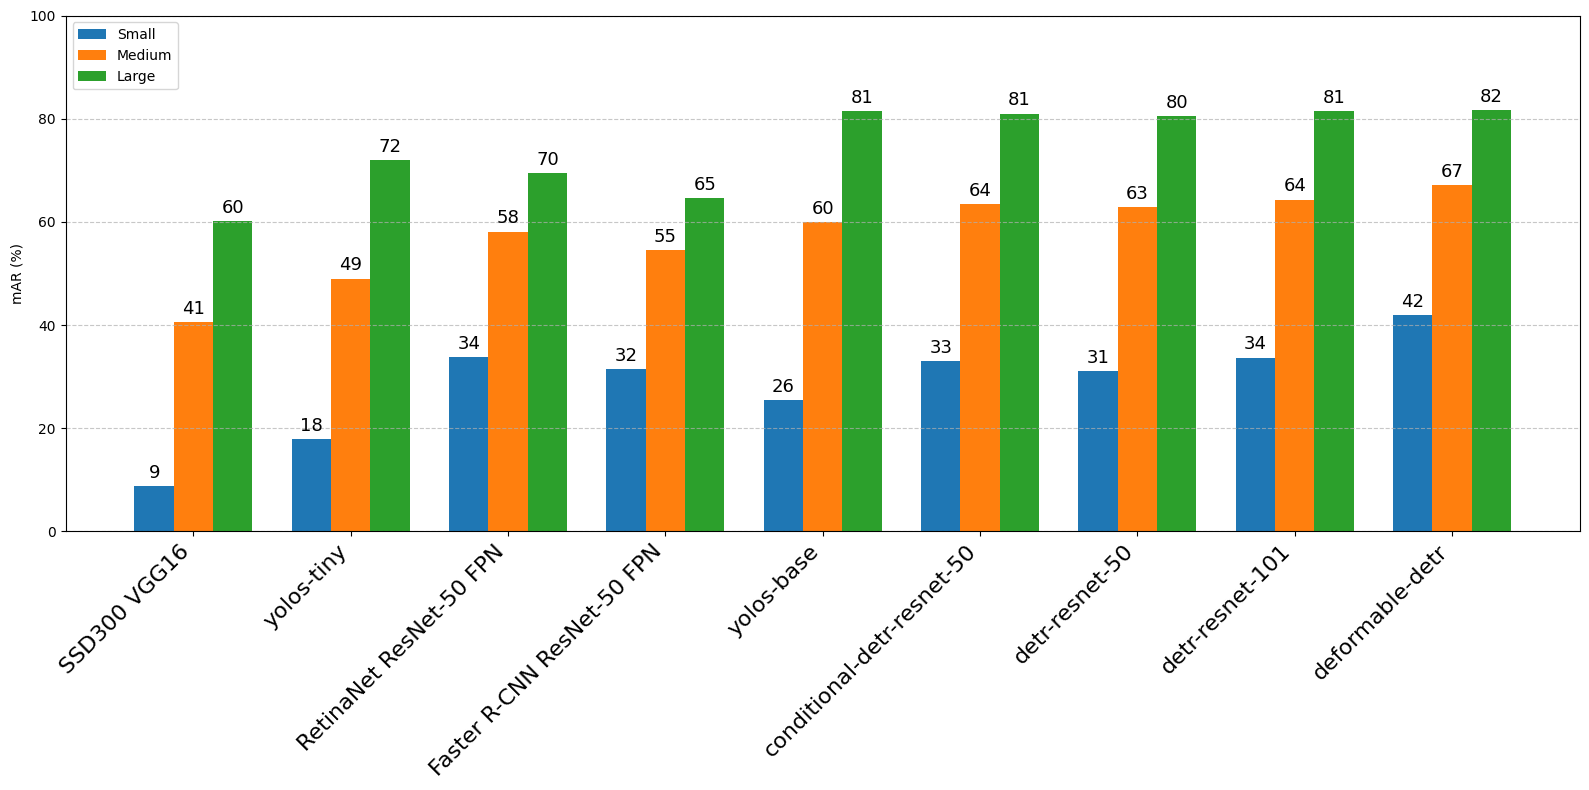

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = [
    "SSD300 VGG16", "yolos-tiny", "RetinaNet ResNet-50 FPN", "Faster R-CNN ResNet-50 FPN",
    "yolos-base", "conditional-detr-resnet-50", "detr-resnet-50", "detr-resnet-101", "deformable-detr"
]

# AR values per object size (multiplied by 100)
ARs = np.array([0.0884, 0.179, 0.338, 0.315, 0.255, 0.330, 0.311, 0.337, 0.419]) * 100
ARm = np.array([0.406, 0.490, 0.581, 0.545, 0.600, 0.635, 0.628, 0.643, 0.672]) * 100
ARl = np.array([0.602, 0.720, 0.695, 0.646, 0.814, 0.810, 0.805, 0.814, 0.817]) * 100

# Set position for each group
x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(16, 8))
bars1 = ax.bar(x - width, ARs, width, label='Small')
bars2 = ax.bar(x, ARm, width, label='Medium')
bars3 = ax.bar(x + width, ARl, width, label='Large')

# Annotate values on top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=13)

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

# Labels and formatting
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=16)
ax.set_ylabel("mAR (%)")
ax.set_ylim(0, 100)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()